# Import Packages

In [1]:
%matplotlib inline
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import manifold, datasets

# Swiss Roll. Original Data

In [2]:
X, color = datasets.samples_generator.make_swiss_roll(n_samples=1500)

Text(0.5, 0.92, 'Swiss Roll')

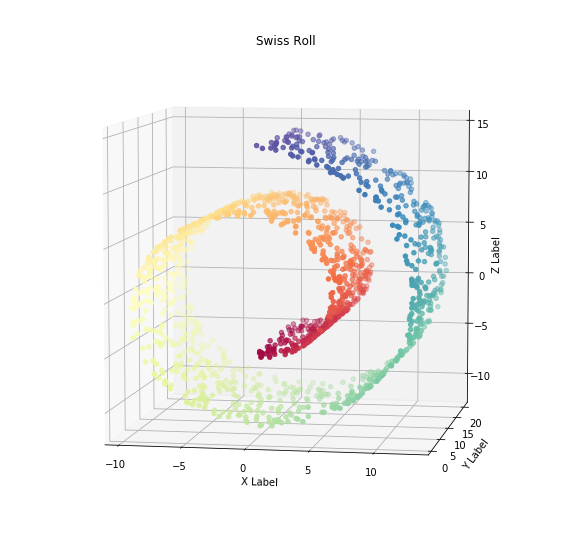

In [3]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.view_init(7, -80)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=color, cmap=plt.cm.Spectral)

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
ax.set_title('Swiss Roll')
#plt.savefig('./original_data.png', transparent=True)

# Swiss Roll. Reduction with PCA (Principal Component Analysis)

Text(0.5, 1.0, 'Reduced to 2D using PCA')

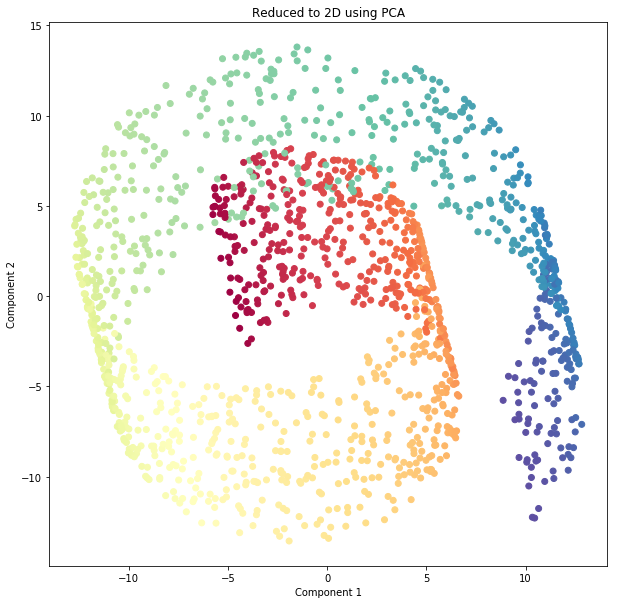

In [4]:
# PCA on 2-dimensions
pca = PCA(n_components=2, random_state=111)
pca.fit(X)
pca_X = pca.transform(X)

# Plot data with dimensionality reduction PCA
fig = plt.figure(figsize=(10, 10))
plt.scatter(pca_X[:,0], pca_X[:,1], c=color, marker='o', cmap=plt.cm.Spectral)

plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('Reduced to 2D using PCA')

#plt.savefig('./pca_reduce.png', transparent=True)

# Swiss Roll. Reduction with LLE (Locally Linear Embeddings).

In [6]:
X_r, err = manifold.locally_linear_embedding(X, n_neighbors=12,
                                             n_components=2)

Text(0.5, 1.0, 'Reduced to 2D using LLE')

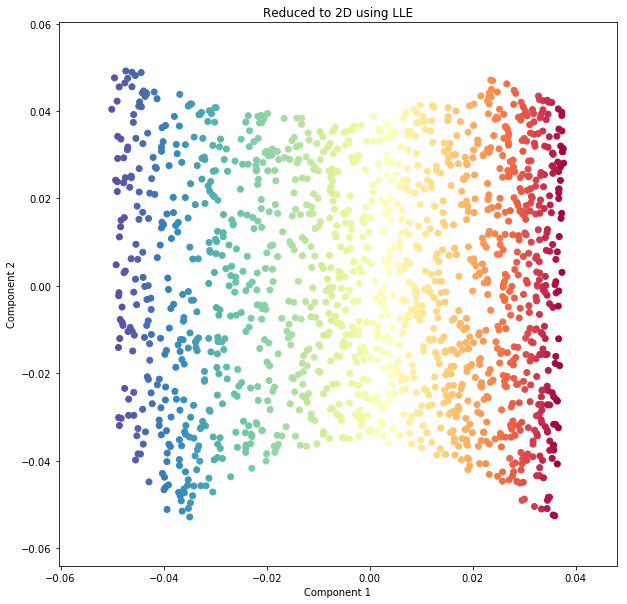

In [7]:
# LLE

# Plot data with dimensionality reduction PCA
fig = plt.figure(figsize=(10, 10))
plt.scatter(X_r[:,0], X_r[:,1], c=color, marker='o', cmap=plt.cm.Spectral)

plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('Reduced to 2D using LLE')

#plt.savefig('./LLE_reduce.png', transparent=True)

In [8]:
def LLE_transform(k_neighbors,X,n_components):
        
        n_samples = X.shape[1]
  
        dist_mat = euclidean_distances(np.transpose(X))
      
        neighbors = np.argsort(dist_mat, axis = 1)[:, 1 : k_neighbors + 1]
        
        W = np.zeros((n_samples, n_samples))
        for i in range(n_samples):
            mat_z = X[i] - X[neighbors[i]]
            mat_c = np.dot(mat_z, mat_z.transpose())
            w = np.linalg.solve(mat_c, np.ones(mat_c.shape[0]))
            W[i, neighbors[i]] = w / w.sum()
        

        eigen_values, eigen_vectors = np.linalg.eig(W)
        
        embedded_matrix=X.dot(eigen_vectors[:,:n_components])
        return embedded_matrix

In [10]:
from sklearn.metrics.pairwise import euclidean_distances

In [12]:
import numpy as np

In [13]:
X_r = LLE_transform(12, X, 2)

Text(0.5, 1.0, 'Reduced to 2D using LLE')

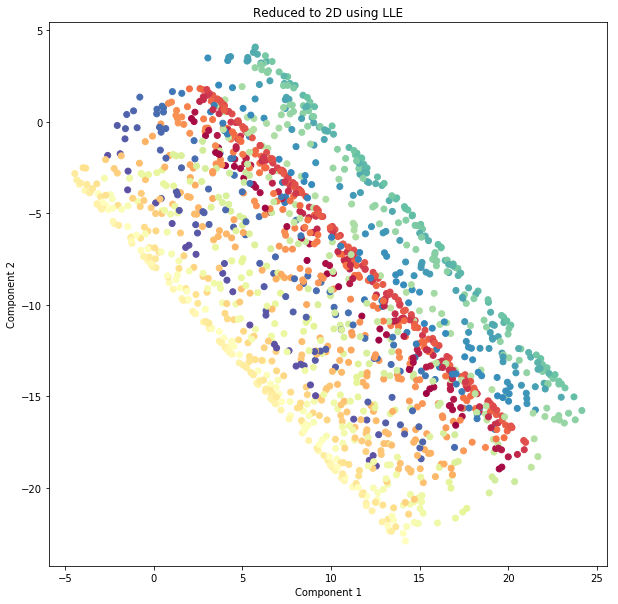

In [14]:
fig = plt.figure(figsize=(10, 10))
plt.scatter(X_r[:,0], X_r[:,1], c=color, marker='o', cmap=plt.cm.Spectral)

plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('Reduced to 2D using LLE')

#plt.savefig('./LLE_reduce.png', transparent=True)